In [3]:
import time
import warnings
from collections import defaultdict
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

%pip install torchinfo

import torchinfo

from torch import nn
import torchvision
from torchvision import transforms
from torchinfo import summary

from IPython.display import clear_output

sns.set(font_scale=1, style="darkgrid", palette="Set2")
warnings.simplefilter("ignore")

device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)

val_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)

classes = [str(i) for i in range(10)]

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.67MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:06<00:00, 244kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.35MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



5


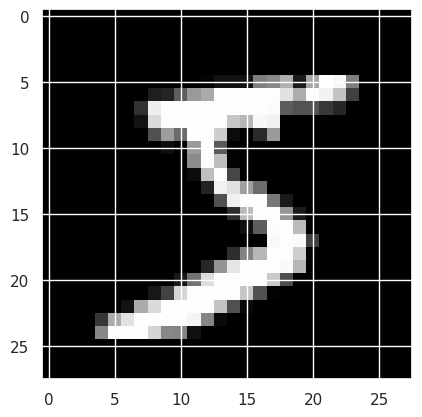

0


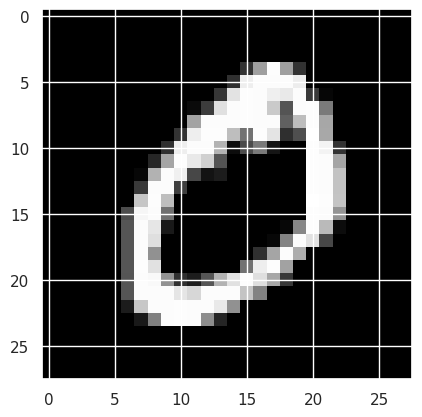

4


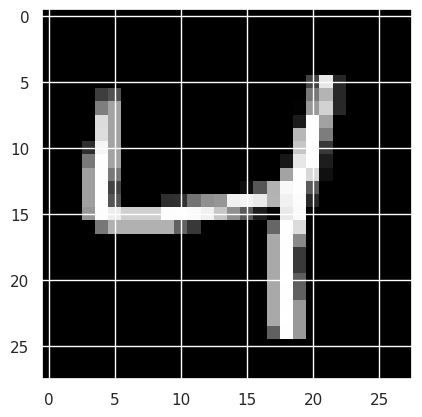

In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_dataset)
for picture in range(3):
    images, labels = next(dataiter)

    print(labels)
    imshow(torchvision.utils.make_grid(images))

In [16]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)

for batch in trainloader:
    inputs, labels = batch
    inputs = inputs.to(device, non_blocking=True)
    labels = labels.to(device, non_blocking=True)

for batch in valloader:
    inputs, labels = batch
    inputs = inputs.to(device, non_blocking=True)
    labels = labels.to(device, non_blocking=True)

In [7]:
simple_cnn1 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(16 * 14 * 14, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
).to(device)

simple_cnn2 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

simple_cnn3 = nn.Sequential(
    nn.Conv2d(1, 16, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16 * 13 * 13, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10),
).to(device)

simple_cnn4 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 3 * 3, 10)
).to(device)

simple_cnn5 = nn.Sequential(
    nn.Conv2d(1, 12, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(12, 24, 3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(24 * 5 * 5, 120),
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10),
).to(device)

In [8]:
print("Simple CNN 1:")
torchinfo.summary(simple_cnn1, input_size=(4, 1, 28, 28))

Simple CNN 1:


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [4, 10]                   --
├─Conv2d: 1-1                            [4, 16, 28, 28]           160
├─ReLU: 1-2                              [4, 16, 28, 28]           --
├─MaxPool2d: 1-3                         [4, 16, 14, 14]           --
├─Flatten: 1-4                           [4, 3136]                 --
├─Linear: 1-5                            [4, 128]                  401,536
├─ReLU: 1-6                              [4, 128]                  --
├─Linear: 1-7                            [4, 64]                   8,256
├─ReLU: 1-8                              [4, 64]                   --
├─Linear: 1-9                            [4, 32]                   2,080
├─ReLU: 1-10                             [4, 32]                   --
├─Linear: 1-11                           [4, 10]                   330
Total params: 412,362
Trainable params: 412,362
Non-trainable params: 0


In [9]:
print("Simple CNN 2:")
torchinfo.summary(simple_cnn2, input_size=(4, 1, 28, 28))

Simple CNN 2:


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [4, 10]                   --
├─Conv2d: 1-1                            [4, 16, 28, 28]           160
├─ReLU: 1-2                              [4, 16, 28, 28]           --
├─Conv2d: 1-3                            [4, 32, 28, 28]           4,640
├─ReLU: 1-4                              [4, 32, 28, 28]           --
├─MaxPool2d: 1-5                         [4, 32, 14, 14]           --
├─Conv2d: 1-6                            [4, 64, 14, 14]           18,496
├─ReLU: 1-7                              [4, 64, 14, 14]           --
├─MaxPool2d: 1-8                         [4, 64, 7, 7]             --
├─Flatten: 1-9                           [4, 3136]                 --
├─Linear: 1-10                           [4, 128]                  401,536
├─ReLU: 1-11                             [4, 128]                  --
├─Linear: 1-12                           [4, 10]                   1,290

In [10]:
print("Simple CNN 3:")
torchinfo.summary(simple_cnn3, input_size=(4, 1, 28, 28))

Simple CNN 3:


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [4, 10]                   --
├─Conv2d: 1-1                            [4, 16, 26, 26]           160
├─ReLU: 1-2                              [4, 16, 26, 26]           --
├─MaxPool2d: 1-3                         [4, 16, 13, 13]           --
├─Flatten: 1-4                           [4, 2704]                 --
├─Linear: 1-5                            [4, 120]                  324,600
├─ReLU: 1-6                              [4, 120]                  --
├─Linear: 1-7                            [4, 84]                   10,164
├─ReLU: 1-8                              [4, 84]                   --
├─Linear: 1-9                            [4, 10]                   850
Total params: 335,774
Trainable params: 335,774
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.78
Input size (MB): 0.01
Forward/backward pass size (MB): 0.35
Params size (MB): 1.34
Estimated Total Siz

In [11]:
print("Simple CNN 4:")
torchinfo.summary(simple_cnn4, input_size=(4, 1, 28, 28))

Simple CNN 4:


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [4, 10]                   --
├─Conv2d: 1-1                            [4, 16, 28, 28]           160
├─ReLU: 1-2                              [4, 16, 28, 28]           --
├─Conv2d: 1-3                            [4, 32, 28, 28]           4,640
├─ReLU: 1-4                              [4, 32, 28, 28]           --
├─MaxPool2d: 1-5                         [4, 32, 14, 14]           --
├─Conv2d: 1-6                            [4, 64, 14, 14]           18,496
├─ReLU: 1-7                              [4, 64, 14, 14]           --
├─MaxPool2d: 1-8                         [4, 64, 7, 7]             --
├─Conv2d: 1-9                            [4, 128, 7, 7]            73,856
├─ReLU: 1-10                             [4, 128, 7, 7]            --
├─MaxPool2d: 1-11                        [4, 128, 3, 3]            --
├─Flatten: 1-12                          [4, 1152]                 --
├─L

In [12]:
print("Simple CNN 5:")
torchinfo.summary(simple_cnn5, input_size=(4, 1, 28, 28))

Simple CNN 5:


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [4, 10]                   --
├─Conv2d: 1-1                            [4, 12, 26, 26]           120
├─ReLU: 1-2                              [4, 12, 26, 26]           --
├─MaxPool2d: 1-3                         [4, 12, 13, 13]           --
├─Conv2d: 1-4                            [4, 24, 11, 11]           2,616
├─ReLU: 1-5                              [4, 24, 11, 11]           --
├─MaxPool2d: 1-6                         [4, 24, 5, 5]             --
├─Flatten: 1-7                           [4, 600]                  --
├─Linear: 1-8                            [4, 120]                  72,120
├─ReLU: 1-9                              [4, 120]                  --
├─Linear: 1-10                           [4, 84]                   10,164
├─ReLU: 1-11                             [4, 84]                   --
├─Linear: 1-12                           [4, 10]                   850
To

In [13]:
def print_epoch(epoch, num_epochs, history, t):
    clear_output(wait=True)
    print("Epoch {} of {} took {:.3f} s".format(epoch + 1, num_epochs, t))
    print("  training loss: \t{:.6f}".format(history["loss"]["train"][-1]))
    print("  validation loss: \t{:.6f}".format(history["loss"]["val"][-1]))
    print(
        "  training accuracy: \t\t\t{:.2f} %".format(
            history["acc"]["train"][-1] * 100)
    )
    print(
        "  validation accuracy: \t\t\t{:.2f} %".format(
            history["acc"]["val"][-1] * 100)
    )


def update_history(history, loss, acc, num_batches, mode):
    loss /= num_batches
    acc /= num_batches
    history["loss"][mode].append(loss)
    history["acc"][mode].append(acc)


def get_batch_loss(X_batch, y_batch, model, criterion, current_loss, current_acc):
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)

    logits = model(X_batch)

    loss = criterion(logits, y_batch.long().to(device))

    current_loss += loss.detach().cpu().numpy()
    y_pred = logits.max(1)[1].detach().cpu().numpy()
    current_acc += np.mean(y_batch.cpu().numpy() == y_pred)
    return loss, current_loss, current_acc


def train(model, criterion, optimizer, train_batch_gen, val_batch_gen, num_epochs=40):
    history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss, val_loss = 0, 0
        train_acc, val_acc = 0, 0
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_batch_gen:
            loss, train_loss, train_acc = get_batch_loss(
                X_batch, y_batch, model, criterion, train_loss, train_acc
            )

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        update_history(history, train_loss, train_acc,
                       len(train_batch_gen), "train")

        model.train(False)
        with torch.no_grad():
            for X_batch, y_batch in val_batch_gen:
                _, val_loss, val_acc = get_batch_loss(
                    X_batch, y_batch, model, criterion, val_loss, val_acc
                )

        update_history(history, val_loss, val_acc, len(val_batch_gen), "val")

        print_epoch(epoch, num_epochs, history, time.time() - start_time)

    return history


def plot_histories(histories, names):
    sns.set_style("darkgrid")
    colors = ["darkblue", "lightcoral", "limegreen", "sandybrown", "cyan"]
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    epochs = min([len(h["loss"]["train"]) for h in histories])
    for i, (history, name) in enumerate(zip(histories, names)):
        axs[0].set_title("Лосс")
        axs[0].plot(
            history["loss"]["train"][:epochs],
            label=f"{name}",
            lw=2,
            c=colors[i],
        )
        axs[0].plot(history["loss"]["val"][:epochs],
                    lw=1.5, c=colors[i], ls="--")
        axs[0].set_xlabel("Эпохи")

        axs[1].set_title("Точность")
        axs[1].plot(
            history["acc"]["train"][:epochs], label=f"{name}", lw=2, c=colors[i]
        )
        axs[1].plot(history["acc"]["val"][:epochs],
                    lw=1.5, c=colors[i], ls="--")
        axs[1].set_xlabel("Эпохи")
        axs[1].legend()

    dummy_lines = [
        axs[0].plot([], [], c="black", lw=2)[0],
        axs[0].plot([], [], c="black", lw=1.5, ls="--")[0],
    ]
    for i in range(2):
        legend = axs[i].legend(loc=3 - i)
        axs[i].legend(dummy_lines, ["train", "val"], loc=4)
        axs[i].add_artist(legend)
    plt.show()

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam

models_and_optimazers = [
    (simple_cnn1, torch.optim.Adam(simple_cnn1.parameters())),
    (simple_cnn2, torch.optim.Adam(simple_cnn2.parameters())),
    (simple_cnn3, torch.optim.Adam(simple_cnn3.parameters())),
    (simple_cnn4, torch.optim.Adam(simple_cnn4.parameters())),
    (simple_cnn5, torch.optim.Adam(simple_cnn5.parameters())),
]
models_history = []

for model, optimizer in models_and_optimazers:
    models_history.append(
        train(model, criterion, optimizer, trainloader, valloader, num_epochs=5)
    )

Epoch 5 of 5 took 47.655 s
  training loss: 	0.029297
  validation loss: 	0.033099
  training accuracy: 			99.16 %
  validation accuracy: 			99.05 %


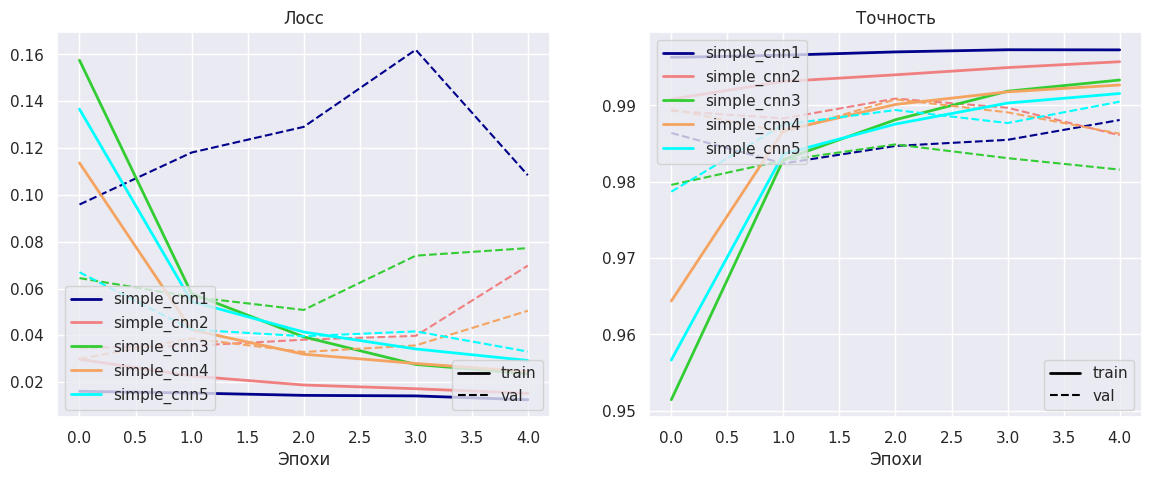

In [18]:
model_names = ["simple_cnn" + str(ind) for ind in range(1, 6)]

plot_histories(models_history, model_names)

In [19]:
model_3x3 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

model_5x5 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

model_mixed = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

model_mixed_reversed = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 64, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
models_history = []

In [20]:
models_history.append(
    train(
        model_3x3,
        criterion,
        torch.optim.Adam(model_3x3.parameters()),
        trainloader,
        valloader,
        num_epochs=5,
    )
)

Epoch 5 of 5 took 48.787 s
  training loss: 	0.021002
  validation loss: 	0.032231
  training accuracy: 			99.34 %
  validation accuracy: 			99.14 %


In [21]:
models_history.append(
    train(
        model_5x5,
        criterion,
        torch.optim.Adam(model_5x5.parameters()),
        trainloader,
        valloader,
        num_epochs=5,
    )
)

Epoch 5 of 5 took 49.826 s
  training loss: 	0.025622
  validation loss: 	0.043197
  training accuracy: 			99.27 %
  validation accuracy: 			99.14 %


In [22]:
models_history.append(
    train(
        model_mixed,
        criterion,
        torch.optim.Adam(model_mixed.parameters()),
        trainloader,
        valloader,
        num_epochs=5,
    )
)

Epoch 5 of 5 took 49.655 s
  training loss: 	0.020946
  validation loss: 	0.033805
  training accuracy: 			99.36 %
  validation accuracy: 			99.02 %


In [23]:
models_history.append(
    train(
        model_mixed_reversed,
        criterion,
        torch.optim.Adam(model_mixed_reversed.parameters()),
        trainloader,
        valloader,
        num_epochs=5,
    )
)

Epoch 5 of 5 took 51.198 s
  training loss: 	0.024186
  validation loss: 	0.023447
  training accuracy: 			99.30 %
  validation accuracy: 			99.32 %


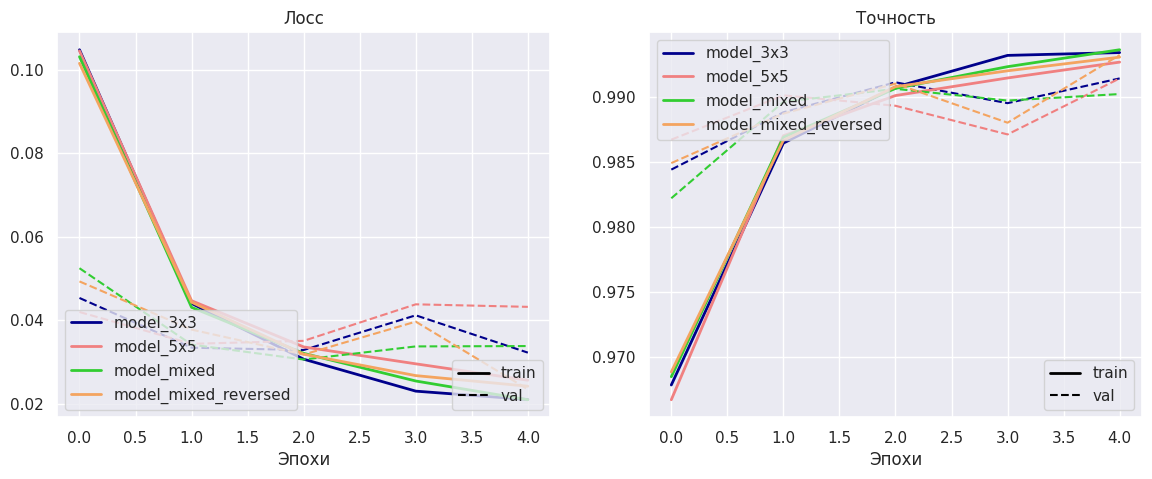

In [24]:
model_names = ["model_3x3", "model_5x5", "model_mixed", "model_mixed_reversed"]

plot_histories(models_history, model_names)

Точность по каждому классу:
(0, 0.9959183673469387)
(1, 1.0)
(2, 0.9961240310077519)
(3, 0.996039603960396)
(4, 0.9898167006109979)
(5, 0.9865470852017937)
(6, 0.9864300626304802)
(7, 0.9912451361867705)
(8, 0.9866529774127311)
(9, 0.9831516352824579)


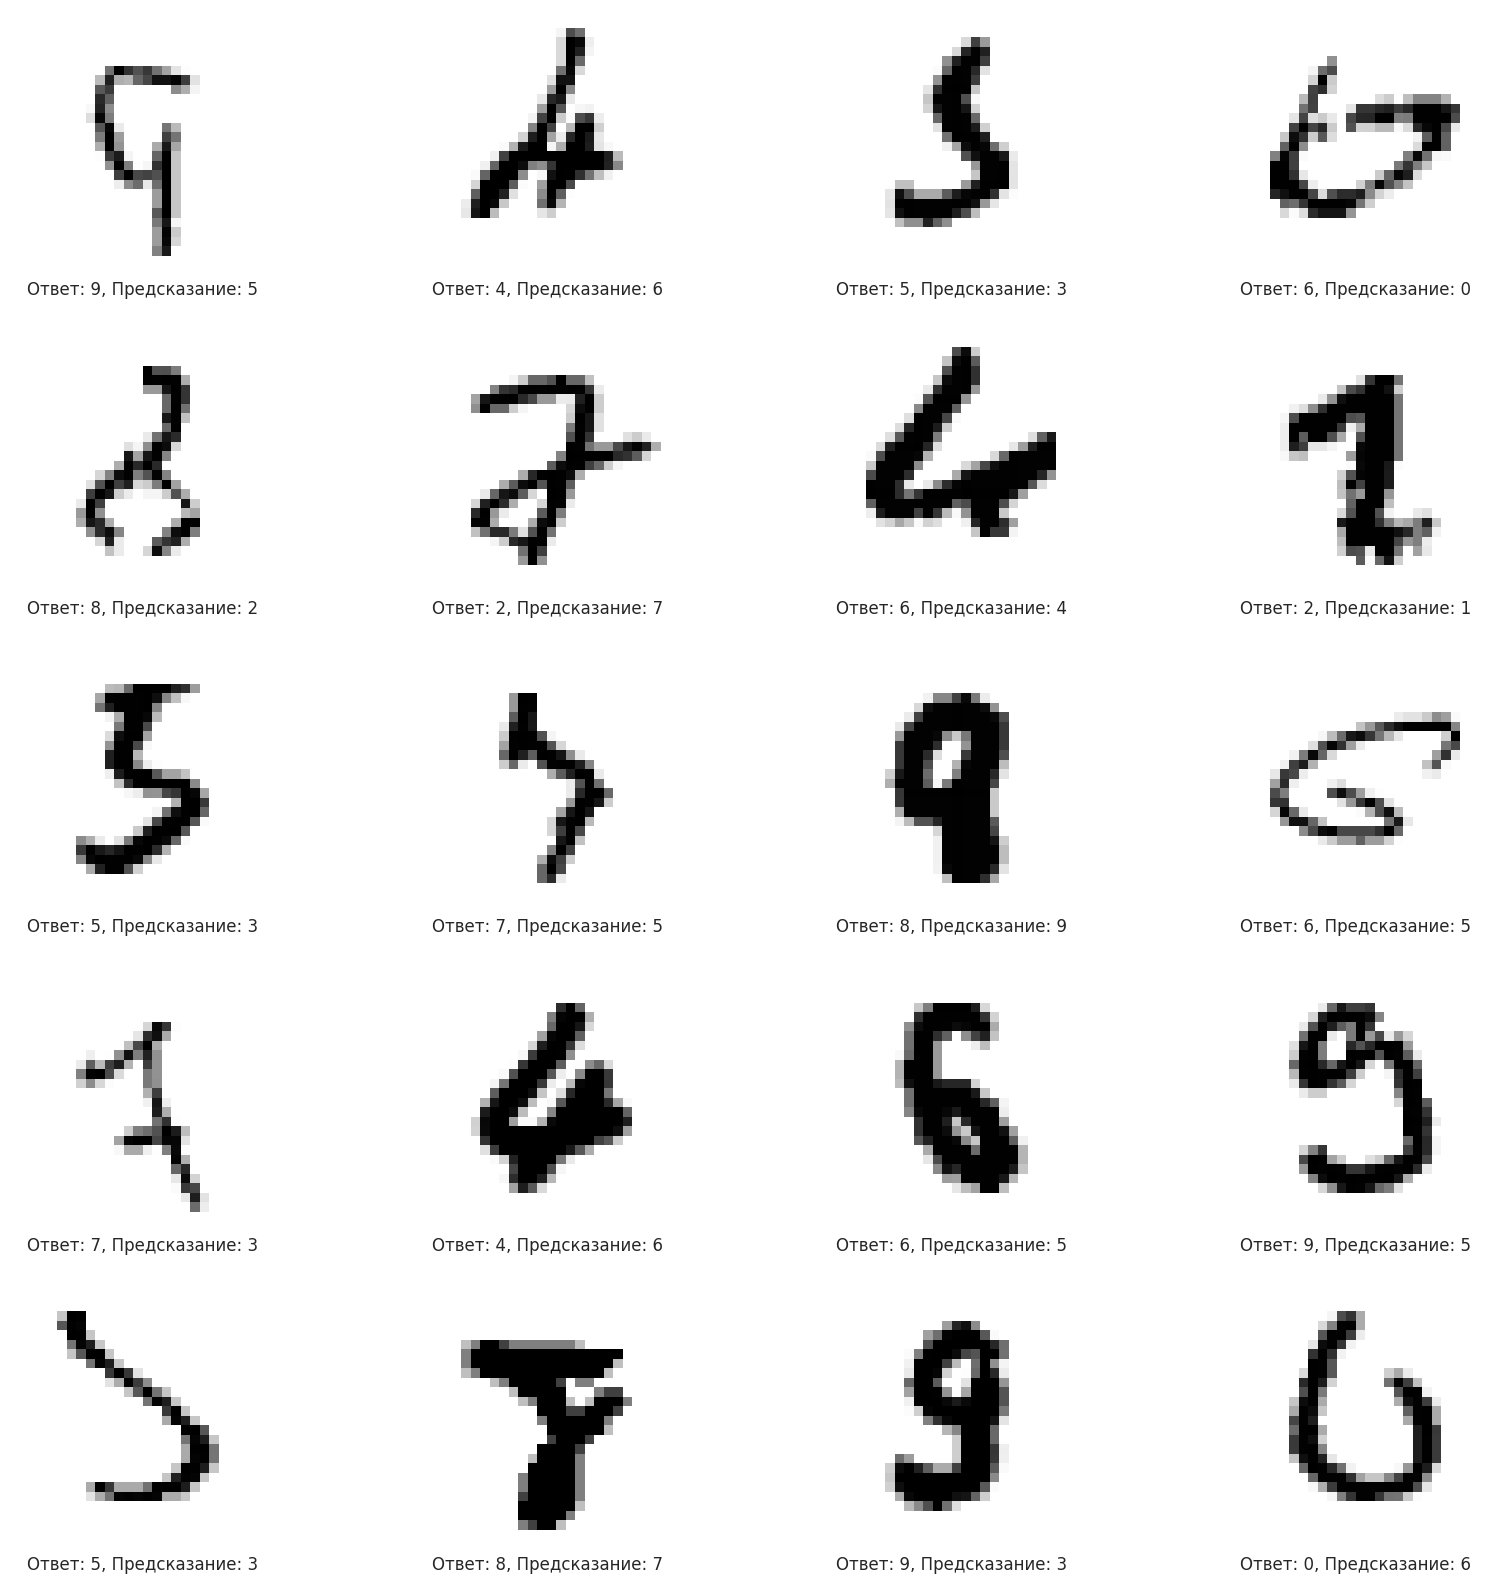

Ошибочные предсказания:
Ответ: 9, Предсказание: 5
Ответ: 4, Предсказание: 6
Ответ: 5, Предсказание: 3
Ответ: 6, Предсказание: 0
Ответ: 8, Предсказание: 2
Ответ: 2, Предсказание: 7
Ответ: 6, Предсказание: 4
Ответ: 2, Предсказание: 1
Ответ: 5, Предсказание: 3
Ответ: 7, Предсказание: 5
Ответ: 8, Предсказание: 9
Ответ: 6, Предсказание: 5
Ответ: 7, Предсказание: 3
Ответ: 4, Предсказание: 6
Ответ: 6, Предсказание: 5
Ответ: 9, Предсказание: 5
Ответ: 5, Предсказание: 3
Ответ: 8, Предсказание: 7
Ответ: 9, Предсказание: 3
Ответ: 0, Предсказание: 6


In [26]:
def validate_model(model, val_loader):
    model.eval()
    correct = {
        i: 0 for i in range(10)
    }
    total = {
        i: 0 for i in range(10)
    }

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for i in range(len(labels)):
                label = int(labels[i])
                pred = int(predicted[i])
                total[label] += 1
                if label == pred:
                    correct[label] += 1

    accuracy = {
        i: correct[i] / total[i] for i in range(10)
    }
    return accuracy


best_model = model_3x3
best_model_accuracy = validate_model(best_model, valloader)

print("Точность по каждому классу:")
for lable, accuracy in best_model_accuracy.items():
    print((lable, accuracy))


def get_misclassified_images(model, valloader):
    model.eval()
    misclassified_images = []
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            for i in range(len(labels)):
                if predicted[i] != labels[i]:
                    misclassified_images.append((images[i], labels[i], predicted[i]))
    return misclassified_images


misclassified_images = get_misclassified_images(best_model, valloader)

plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, true_label, predicted_label = misclassified_images[i]
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(f"Ответ: {true_label}, Предсказание: {predicted_label}")
plt.show()

print("Ошибочные предсказания:")
for i in range(20):
    image, true_label, predicted_label = misclassified_images[i]
    print(f"Ответ: {true_label}, Предсказание: {predicted_label}")